[[0.3225882 ]
 [0.14219055]]
[[0.14218878]
 [0.32258846]]


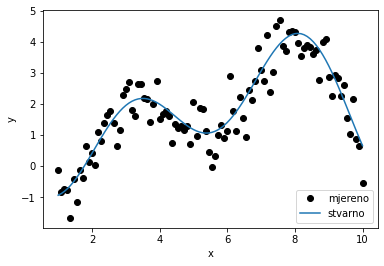

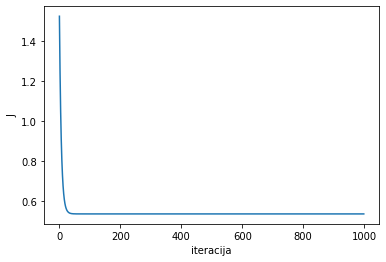

Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x


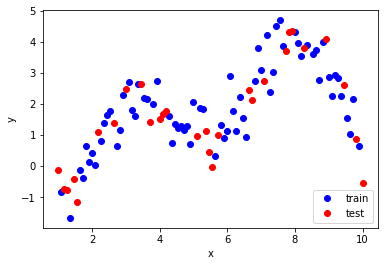

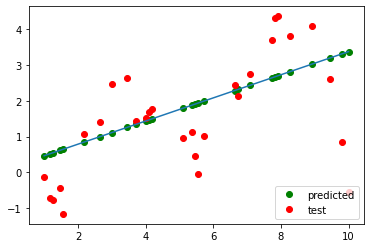

In [106]:
#Zadatak 2 i 3

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def predict(x, theta):

    return theta[0] + theta[1]*x

def kriterijJ(x, y, theta):

    J = 0.0
    n = x.shape[0]

    for i in range(0,n):
        J += (predict(x[i], theta) - y[i]) ** 2
    
    J /= (2*n)

    return J

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

#Zad 2

arr=[]
arr=[1 for i in range(len(indeksi_train))] #popunjavanje jedinicama 
arr=np.array([arr]) #2D array
X=np.append(xtrain,arr.T,axis=1) #dodavanje stupca sa jedinicama

theta=np.linalg.inv(X.T@X)@X.T@ytrain #formula (4-10)

print(theta)

#Zad 3
theta_old=np.array([0.1,0.1]) #inicijalne vrijednosti theta
theta_new=np.zeros((2,1))
alfa=0.05
n=len(xtrain)

J = np.zeros((1000,1)) #kriterijska funkcija

for j in range(1000):

  J[j] = kriterijJ(xtrain,ytrain,theta_old) #spremanje vrijednosti kriterijske funkcije za svaku iteraciju

  rj0=0.0
  rj1=0.0

  for i in range(n): #računanje metodom gradijentnog spusta
    rj0 += (predict(xtrain[i], theta_old)-ytrain[i])
    rj1 += (predict(xtrain[i], theta_old)-ytrain[i])*xtrain[i]

  rj0 = rj0 * (1/n)
  rj1 = rj1 * (1/n)

  theta_new[0]=theta_old[0]-alfa*rj0
  theta_new[1]=theta_old[1]-alfa*rj1

  theta_old=theta_new


print(theta_new)

#prikaz kriterijske funkcije kroz iteracije
plt.figure(3)
plt.plot(range(1000),J)
plt.ylabel('J')
plt.xlabel('iteracija')
plt.show()


plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)


MSE for 15 degree:
0.14471872452176074
0.686262720339181
MSE for 6 degree:
0.19556471929778277
0.31157034291242314
MSE for 2 degree:
0.7579630147780276
1.2745083887453057


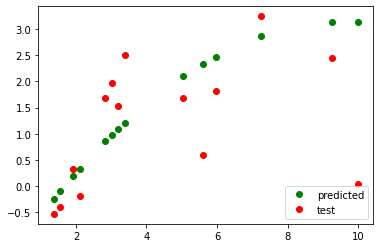

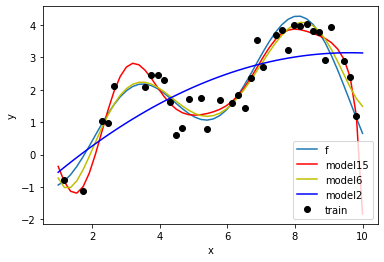

In [117]:
#Zadatak 5

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytrain_p = linearModel.predict(xtrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
MSE_train = mean_squared_error(ytrain, ytrain_p)

#Zad 5
print("MSE for 15 degree:")
print(MSE_train)
print(MSE_test)
linearModel15=linearModel
xnew15=xnew

# make polynomial features
poly = PolynomialFeatures(degree=6)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytrain_p = linearModel.predict(xtrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
MSE_train = mean_squared_error(ytrain, ytrain_p)

print("MSE for 6 degree:")
print(MSE_train)
print(MSE_test)
linearModel6=linearModel
xnew6=xnew

# make polynomial features
poly = PolynomialFeatures(degree=2)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytrain_p = linearModel.predict(xtrain)
ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)
MSE_train = mean_squared_error(ytrain, ytrain_p)

print("MSE for 2 degree:")
print(MSE_train)
print(MSE_test)
linearModel2=linearModel
xnew2=xnew

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel15.predict(xnew15),'r-',label='model15')
plt.plot(x, linearModel6.predict(xnew6),'y-',label='model6')
plt.plot(x, linearModel2.predict(xnew2),'b-',label='model2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.89859e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


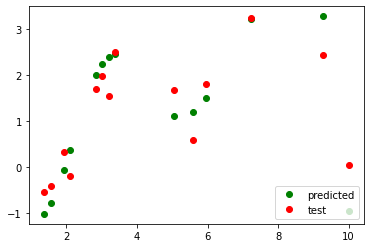

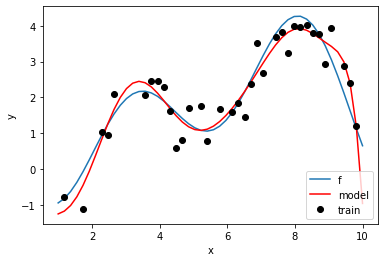

In [126]:
#Zadatak 6

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.Ridge(alpha=0.5)
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)


(354, 105)
(152, 105)
(354,)
(152,)
18.12803011177856


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

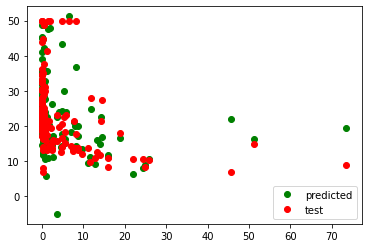

In [14]:
#Zadatak 7

from sklearn.datasets import load_boston
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as lm
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


boston = load_boston()
X = boston.data
y = boston.target

poly = PolynomialFeatures(degree=2)
xnew = poly.fit_transform(X)

model = lm.LinearRegression()
model.fit(X, y)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(xnew, y, test_size=0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

model = lm.LinearRegression()
model.fit(X_train, Y_train)

pred_test = model.predict(X_test)
MSE_test = mean_squared_error(Y_test, pred_test)
print(MSE_test)

plt.figure(1)
plt.plot(X_test[:,1],pred_test,'og',label='predicted')
plt.plot(X_test[:,1],Y_test,'or',label='test')
plt.legend(loc = 4)




/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.837e+00, tolerance: 5.921e-03
  model = cd_fast.enet_coordinate_descent(


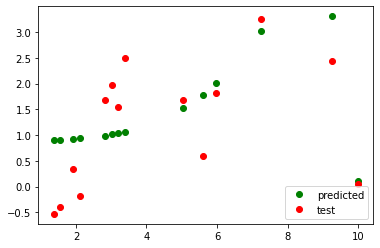

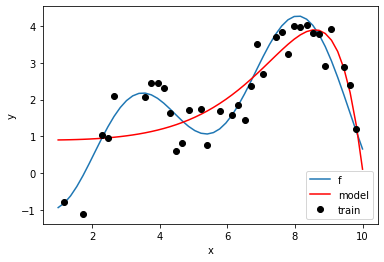

In [16]:
#Dodatni zadatak

#Zadatak 6

import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.Lasso(alpha=0.5)
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)
